**Climate Losses in Developed Countries**

As the scale of the climate crisis increases, rising temperatures and changing weather patterns point to a unique emergency. The human greenhouse gas emissions impacts go far deeper than environmental concerns, profoundly affecting global economies. Working with publicly available data, our study examines the specific economic consequences of climate change across Europe over the last decade. Using the Eurostat API in the Python programming language, we examine the direct consequences of climate-related economic losses.

The data source, the Climate-Related Economic Losses dataset, provides a comprehensive account of economic losses due to various climate events over the past decade.


In [2]:
# install pyeurostat library
#!pip install eurostat

import eurostat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = eurostat.get_data_df('CLI_IAD_LOSS')
data.head(5)

,freq,statinfo,stk_flow,unit,geo\TIME_PERIOD,1980,1981,1982,1983,1984,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,AVG_30Y,LOSS,EUR_HAB,AT,NaN,NaN,NaN,NaN,NaN,...,39.03,38.73,38.29,37.88,40.38,41.55,43.52,42.30,44.38,44.70
1,A,AVG_30Y,LOSS,EUR_HAB,BE,NaN,NaN,NaN,NaN,NaN,...,8.37,10.49,10.43,10.76,10.80,11.34,12.08,9.49,40.30,42.26
2,A,AVG_30Y,LOSS,EUR_HAB,BG,NaN,NaN,NaN,NaN,NaN,...,11.35,16.51,21.80,21.96,22.12,22.28,22.43,22.60,22.79,24.44
3,A,AVG_30Y,LOSS,EUR_HAB,CH,NaN,NaN,NaN,NaN,NaN,...,70.29,69.54,68.55,65.90,53.28,52.63,52.96,49.78,50.79,49.58
4,A,AVG_30Y,LOSS,EUR_HAB,CY,NaN,NaN,NaN,NaN,NaN,...,8.31,8.41,8.45,16.32,16.17,15.09,14.89,14.72,14.77,14.57


To see which countries are in our data set, we type unique values from the 'geo\TIME_PERIOD' column.

In [3]:
data['geo\\TIME_PERIOD'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT',
       'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK',
       'TR'], dtype=object)

We created a list of years in strings from 2013 to 2022 and then filtered a DataFrame (data) according to certain conditions related to statistical information, 'stock flow' type and monetary 'unit'. It selects columns related to geographic information and specified years, renames the geographic column and prints the resulting DataFrame.








In [4]:
# Generate a list of years as strings between 2013 and 2022
years = [str(year) for year in range(2013, 2023)]

# Define filter conditions based on specific columns in the dataset
filter_condition = (
    (data['statinfo'] == 'VAL_A') &  # Selecting specific statistical information
    (data['stk_flow'] == 'LOSS') &     # Filtering by stock flow type 'LOSS'
    (data['unit'] == 'MIO_EUR')        # Filtering by monetary unit 'MIO_EUR'
)

# Apply the filter conditions to the dataset and create a filtered DataFrame
filtered_df = data[filter_condition]

# Select only the columns related to geographical information and the specified years
filtered_df = filtered_df[['geo\\TIME_PERIOD'] + years]

# Rename the column related to geographical information for clarity
filtered_df = filtered_df.rename(columns={'geo\\TIME_PERIOD': 'geo'})

# Print the resulting filtered DataFrame
print(filtered_df)


           geo     2013     2014     2015    2016     2017     2018     2019  \
105         AT    933.0      0.0      0.0     0.0   1134.0    363.0    573.0   
106         BE      0.0    727.0      0.0   129.0     29.0    203.0    275.0   
107         BG      0.0   1104.0   1117.0     0.0      0.0      0.0      0.0   
108         CH    255.0    101.0      8.0     0.0    388.0    150.0    181.0   
109         CY      0.0      0.0      0.0   202.0      0.0      0.0      0.0   
110         CZ   1856.0     16.0      0.0    62.0    667.0    143.0      0.0   
111         DE  14410.0   2987.0   2755.0  3703.0   5367.0   9520.0   7742.0   
112         DK    930.0     90.0      0.0     0.0      0.0     90.0      0.0   
113         EE      0.0      0.0      0.0     0.0      0.0      0.0      0.0   
114         EL     16.0      5.0     12.0    54.0    125.0     70.0    280.0   
115         ES     13.0      0.0    184.0   385.0    395.0   2054.0   4661.0   
116  EU27_2020  21797.0  12976.0  11552.

We return a tuple representing the dimensions of the filtered DataFrame, where the first element is the number of rows and the second element is the number of columns.

In [5]:
filtered_df.shape

(33, 11)

We extracted a subset of data from the DataFrame by selecting the columns labeled 'geo' and '2022' and created a new DataFrame called year_2022, ensuring that changes made to this DataFrame do not affect the original DataFrame

In [6]:
year_2022= filtered_df.loc[:,['geo','2022']].copy()
year_2022

,geo,2022
105,AT,200.0
106,BE,807.0
107,BG,37.0
108,CH,18.0
109,CY,0.0
110,CZ,72.0
111,DE,10342.0
112,DK,5.0
113,EE,0.0
114,EL,20.0


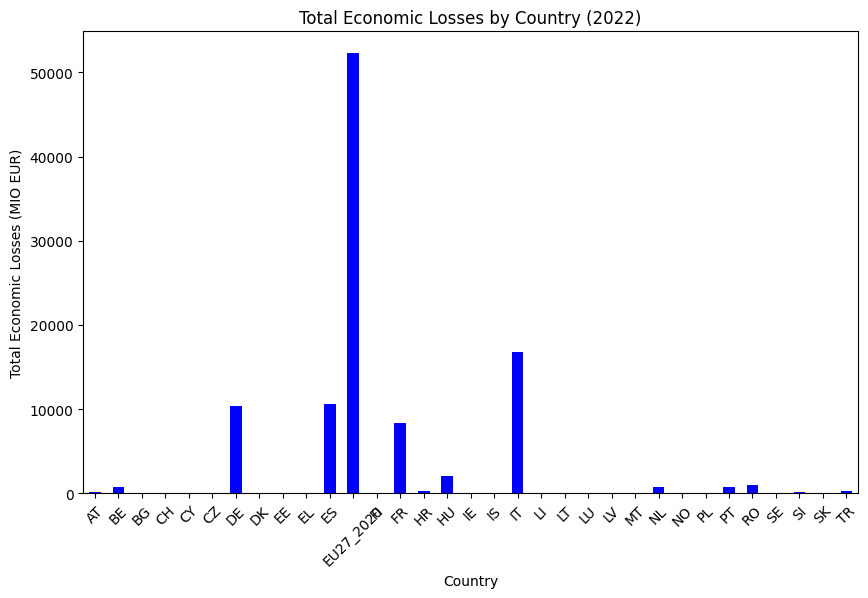

In [14]:
# Calculate the total economic losses for each country in 2022
total_losses = filtered_df.set_index('geo')['2022']

# Plot the total economic losses for each country
plt.figure(figsize=(10, 6))
total_losses.plot(kind='bar', color='blue')
plt.xlabel('Country')
plt.ylabel('Total Economic Losses (MIO EUR)')
plt.title('Total Economic Losses by Country (2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


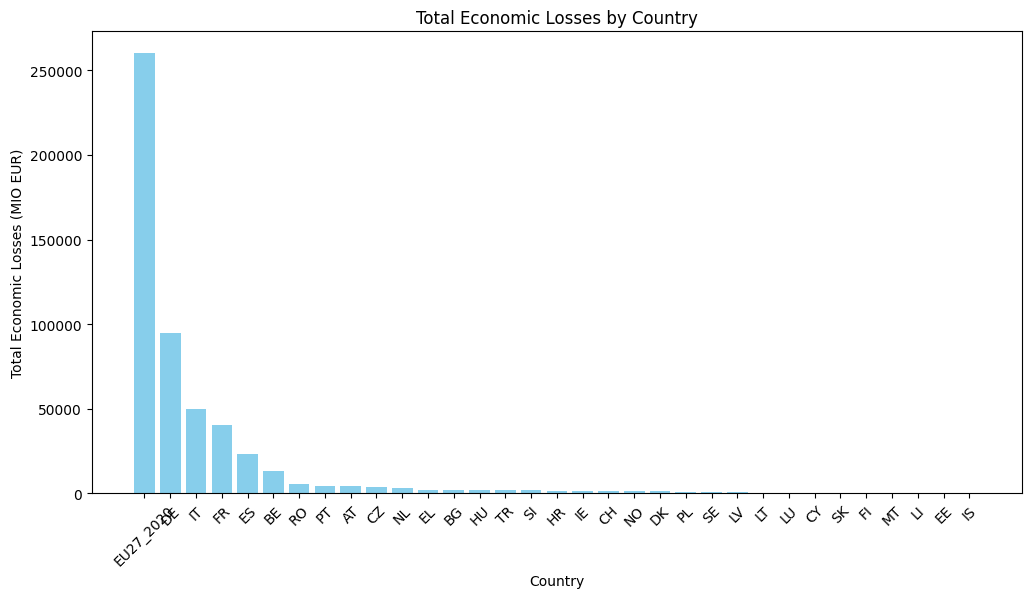

In [19]:
# Create a new column 'Total Economic Losses' by summing the economic losses for each year
filtered_df['Total Economic Losses'] = filtered_df[['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']].sum(axis=1)

# Sort the DataFrame by the 'Total Economic Losses' column in descending order
sorted_df = filtered_df.sort_values(by='Total Economic Losses', ascending=False)

# Plot the total economic losses for all countries
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['geo'], sorted_df['Total Economic Losses'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Economic Losses (MIO EUR)')
plt.title('Total Economic Losses by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


With this code segment, we imported the necessary libraries, selected specific countries for analysis, filtered the dataset to include only data related to those countries, and then created a boxplot to visually represent the distribution of the filtered data

In [26]:
selected_countries = ['IT', 'NL', 'BE', 'ES']
filtered_countries_df = filtered_df[filtered_df['geo'].isin(selected_countries)]

print(filtered_countries_df)

    geo   2013    2014    2015    2016     2017    2018    2019    2020  \
106  BE    0.0   727.0     0.0   129.0     29.0   203.0   275.0   513.0   
115  ES   13.0     0.0   184.0   385.0    395.0  2054.0  4661.0  2282.0   
123  IT  653.0  1728.0  2923.0  2052.0  12374.0  5355.0  4948.0  2552.0   
129  NL  251.0     0.0    27.0   959.0      0.0     0.0    44.0   502.0   

        2021     2022  Total Economic Losses  
106  10723.0    807.0                13406.0  
115   2752.0  10580.0                23306.0  
123    647.0  16739.0                49971.0  
129    700.0    731.0                 3214.0  


<Axes: >

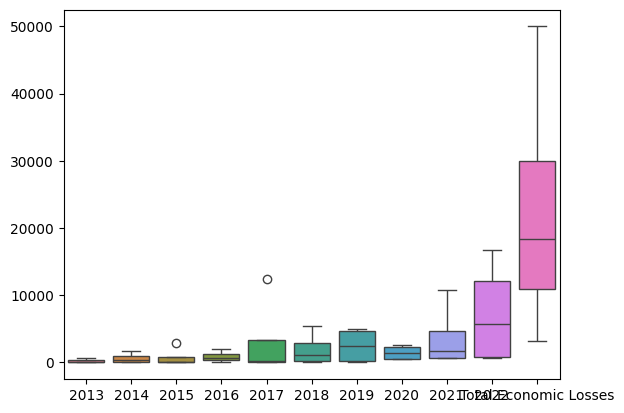

In [27]:
sns.boxplot(filtered_countries_df)

We have shown the economic losses for 2015 and 2017 with a bar plot. We tried to identify which country the outliers from these years belonged to. We observed that the data for Italy is very high and exceeds the average.

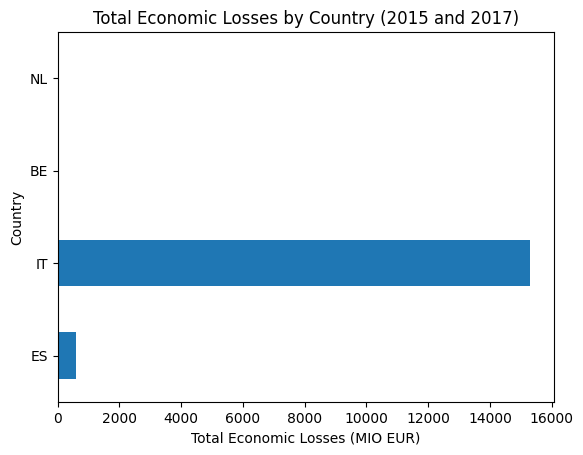

In [50]:
# Selecting the years 2015 and 2017 for economic losses and calculating the total losses for selected countries
total_losses_2015_2017 = filtered_countries_df.set_index('geo').loc[selected_countries, ['2015', '2017']].sum(axis=1)

# Plotting the total economic losses for the years 2015 and 2017 for each country in a horizontal bar chart
total_losses_2015_2017.plot(kind='barh', xlabel='Total Economic Losses (MIO EUR)', ylabel='Country', title='Total Economic Losses by Country (2015 and 2017)')
plt.show()



 We calculated total economic losses for selected countries from 2013 to 2022 and displayed them as a horizontal bar chart.

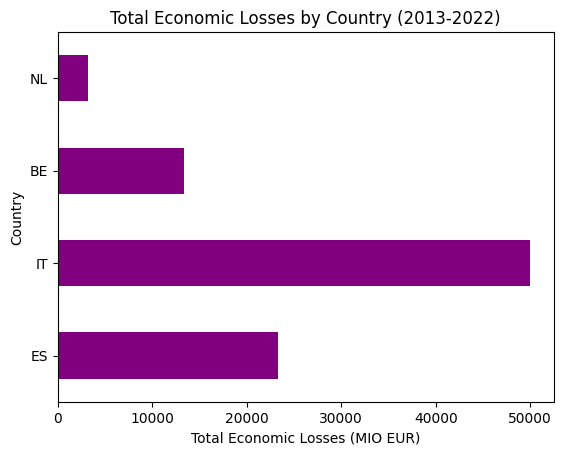

In [44]:
# Calculating the total economic losses for selected countries from 2013 to 2022 and plotting them as a horizontal bar chart
total_losses = filtered_countries_df.set_index('geo').loc[selected_countries, '2013':'2022'].sum(axis=1)
total_losses.plot(kind='barh', xlabel='Total Economic Losses (MIO EUR)', ylabel='Country', title='Total Economic Losses by Country (2013-2022)', color='purple')
plt.show()


We created a pie chart to visualize the distribution of economic losses among the top 5 countries. The percentages in the pie chart represent the proportion of economic losses to total losses for each country.

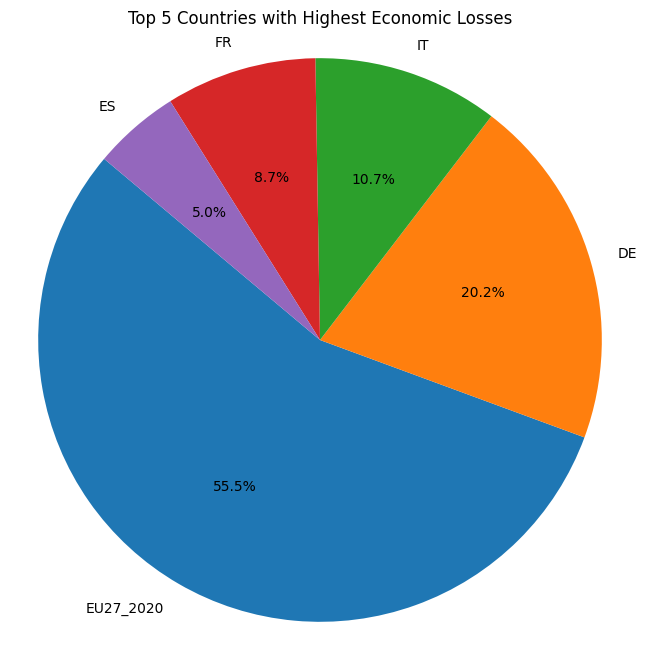

In [64]:
# Create a new column 'Total Economic Losses' by summing the economic losses for each year
filtered_df['Total Economic Losses'] = filtered_df[['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']].sum(axis=1)

# Sort the DataFrame by the 'Total Economic Losses' column in descending order
sorted_df = filtered_df.sort_values(by='Total Economic Losses', ascending=False)

# Select the top 5 countries with the highest economic losses
top_countries = sorted_df.head()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Total Economic Losses'], labels=top_countries['geo'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries with Highest Economic Losses")
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()




**From our dataset, it is evident that Germany, Italy, France, and Spain have incurred the highest economic losses attributed to climate change over the past decade. Additionally, the cumulative losses of all European countries exceed 50%**

In [29]:
import plotly.graph_objs as go

# Select the top 5 countries with the highest economic losses
top_countries = filtered_df.sort_values(by='Total Economic Losses', ascending=False).head()

# Prepare the data
pie_values = top_countries['Total Economic Losses']
labels = top_countries['geo']

# Create traces for the pie chart
trace = go.Pie(labels=labels, values=pie_values, hole=0.3)

# Layout for the graph
layout = go.Layout(title="Top 5 Countries with Highest Economic Losses",
                   width=800, height=800, annotations=[dict(text='Source: Eurostats CLI_IAD_LOSS',
                                                             x=1, y=-0.1, showarrow=False)])

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive pie chart
fig.show()
